# Validation and cross-validation 

In this exercise you will implement a validation pipeline. 

At the end of Exercise 2, you tested your model against the training and test datasets. As you should observe, there's a gap between the results. By validating your model, not only should you be able to anticipate the test time performance, but also have a method to compare different models.

Implement the basic validation method, i.e. a random split. Test it with your model from Exercise 2.

In [16]:
####################################################### 
# TODO: Implement the basic validation method,        # 
# compare MSLE on training, validation, and test sets #
#######################################################
import numpy  as np
from sklearn.cross_validation import train_test_split
from mieszkania import open_dataset

xs, ys = open_dataset('mieszkania.csv')

print xs.shape, ys.shape
txs, vxs, tys, vys = train_test_split(xs, ys, test_size=0.4)

m2, syp, laz, rok, garaz, dzielnica[4]
[104, 2, 2, 1940, 1, 0, 1, 0, 0]
(200, 9) (200,)


RMSE: 0.0843325391444
w: [ 0.67035012  0.1629057   0.14264752  1.19804938  0.05109827  0.09546981
  0.20954945  0.21935257  0.14597829]
0.0843326686621
[107 109 100 108  97  98 108  91  94  81  92  90  96 101  98  99 100 106
  99  99 102  84  94 100  97  94 106 107 113  83 101 107 106 107 104 104
 100  98  98  88 102 100 103  80 101  94 100 108  92  99 134  98  98  98
 107 113 101 104  93 109 104 101  97 118  99 100  88 108 107  92  96 104
  96 103 100  93  93 106  93  94 105 100  97 140  87  95  95  90  96  99
  94 104  99  86 103  98  90  99  87 106 100  94 100  98 108 106  99 100
 110 105  96 130 102 104  96  99  92 101  91  90]
Val: 0.0878867698745


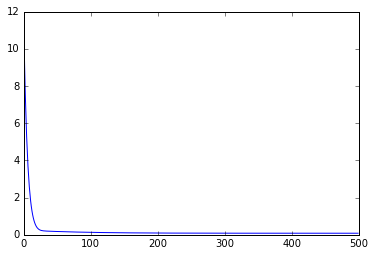

In [17]:
%matplotlib inline
from rmse_regr import RMSERegr
from mieszkania import msle

lr = 1E-3
steps = 500 #TODO

regr = RMSERegr()

zs = np.concatenate((txs[:,:-4], txs[:, -4:] * txs[:,:1]), axis=1)

zs = np.log(zs + 1)
w = regr.regression(zs, np.log(1+tys), [lr] * steps)
my_prices=np.exp(np.sum(zs*w, axis=1))+1
print msle(tys, my_prices)
print (my_prices / tys * 100).astype(int)
# print np.concatenate((prices.reshape((-1,1)), my_prices.reshape((-1,1)), 
                      # (prices / my_prices).reshape((-1,1))
                      # ), axis=1)

zs = np.concatenate((vxs[:,:-4], vxs[:, -4:] * vxs[:,:1]), axis=1)
zs = np.log(zs + 1)
my_prices=np.exp(np.sum(zs*w, axis=1))+1
print 'Val:', msle(vys, my_prices)

To make the random split validation reliable, a huge chunk of training data may be needed. To get over this problem, one may apply cross-validaiton.

![alt-text](https://chrisjmccormick.files.wordpress.com/2013/07/10_fold_cv.png)

Let's now implement the method. Make sure that:
* number of partitions is a parameter,
* the method is not limited to `mieszkania.csv`,
* the method is not limited to one specific model.

RMSE: 0.0863076454157
w: [ 0.66879436  0.16266923  0.14064712  1.19868237  0.05371825  0.09350977
  0.21074706  0.21520924  0.14932828]
RMSE: 0.0852973680231
w: [ 0.67140398  0.16492256  0.14191868  1.19598931  0.05748013  0.09512591
  0.21005542  0.21640904  0.14981361]


RMSE: 0.0854388458323
w: [ 0.67084673  0.16459234  0.14210722  1.19666444  0.05435321  0.09487059
  0.21148854  0.21468758  0.14980002]
RMSE: 0.0831254494889
w: [ 0.67448438  0.16467328  0.14210954  1.19415021  0.05343904  0.09696398
  0.21169802  0.21749896  0.14832342]


RMSE: 0.0854420812449
w: [ 0.66845903  0.16194374  0.1402115   1.19916462  0.05495748  0.09391778
  0.21048629  0.21557133  0.14848362]
RMSE: 0.0860350526294
w: [ 0.66978631  0.16373791  0.14083877  1.19793795  0.05454137  0.09428778
  0.21026777  0.21567985  0.14955091]


RMSE: 0.0859948369684
w: [ 0.67008546  0.16316857  0.14073658  1.19783449  0.05244546  0.09425246
  0.21117639  0.21545231  0.14920431]
RMSE: 0.0825706204846
w: [ 0.66995904  0.16423324  0.14088649  1.1974534   0.05601193  0.09450968
  0.21072952  0.21627304  0.1484468 ]


RMSE: 0.0840853793258
w: [ 0.67031102  0.16362748  0.14145983  1.19735442  0.05202366  0.09417899
  0.21111172  0.2156234   0.14939691]
RMSE: 0.0856041776673
w: [ 0.67087212  0.1639911   0.14034649  1.19724585  0.05573136  0.09561842
  0.21044902  0.21583973  0.14896494]


RMSE: 0.0827091664831
w: [ 0.66834178  0.16279575  0.1412571   1.19909322  0.05361364  0.09320069
  0.21131716  0.21490215  0.14892179]
RMSE: 0.0859102546396
w: [ 0.66950413  0.16333116  0.13966408  1.19806089  0.05471489  0.09460288
  0.21051028  0.21552777  0.14886319]


RMSE: 0.0844775390981
w: [ 0.67317091  0.16438316  0.14154     1.19493426  0.05373774  0.09590764
  0.21143924  0.21671477  0.14910925]
RMSE: 0.0859916354085
w: [ 0.67032865  0.16409969  0.14115838  1.19752094  0.05463209  0.09459781
  0.21082325  0.21558373  0.14932385]


RMSE: 0.0817901929884
w: [ 0.6691335   0.16353949  0.14083338  1.19849437  0.0552826   0.09380353
  0.21079669  0.21520204  0.14933123]
RMSE: 0.0856758198765
w: [ 0.67022203  0.16366057  0.14117062  1.19731695  0.05479052  0.09450206
  0.21013962  0.21555543  0.15002493]


RMSE: 0.0811891893653
w: [ 0.66930142  0.16279408  0.14062863  1.19848622  0.05393584  0.0951164
  0.21050935  0.21509846  0.14857721]
RMSE: 0.0860356840216
w: [ 0.66929913  0.16255172  0.14071082  1.19847033  0.05369223  0.09446675
  0.2100929   0.21602045  0.14871903]


RMSE: 0.0862801382697
w: [ 0.66995933  0.16327693  0.1400483   1.19804182  0.05439927  0.09417299
  0.21089747  0.21579624  0.14909263]
RMSE: 0.0864907716031
w: [ 0.6703908   0.16366637  0.14084205  1.19738709  0.05372425  0.09426045
  0.21060911  0.21605796  0.14946328]
0.0818350440954


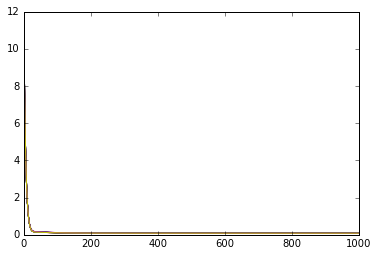

In [45]:
####################################
# TODO: Implement cross-validation # 
####################################
def cross_val(part_n, xs, ys, evaluate):
    perm = np.random.permutation(xs.shape[0])
    xs = xs[perm]
    ys = ys[perm]
    pts = np.linspace(0, xs.shape[0], num=part_n+1, endpoint=True, dtype=int)
    errs = []
    for i in range(part_n):
        a, b = pts[i], pts[i+1]
        errs.append(evaluate(np.concatenate((xs[:a], xs[b:])),
                             np.concatenate((ys[:a], ys[b:])),
                             xs[a:b], ys[a:b]))
    return np.average(errs)

def evaluate(txs, tys, vxs, vys):
    lr = 1E-3
    steps = 1000
    regr = RMSERegr()
    zs = np.concatenate((txs[:,:-4], txs[:, -4:] * txs[:,:1]), axis=1)
    zs = np.log(zs + 1)
    w = regr.regression(zs, np.log(1+tys), [lr] * steps)

    zs = np.concatenate((vxs[:,:-4], vxs[:, -4:] * vxs[:,:1]), axis=1)
    zs = np.log(zs + 1)
    my_prices=np.exp(np.sum(zs*w, axis=1))+1
    err = msle(vys, my_prices)
    return err

print cross_val(20, xs, ys, evaluate)

Recall that sometimes validation may be tricky, e.g. significant class imbalance, having a small number of subjects, geographically clustered instances...

What could in theory go wrong here with random, unstratified partitions? Think about potential solutions and investigate the data in order to check whether these problems arise here.

In [ ]:
##############################
# TODO: Investigate the data #
##############################